16008450 Inés Alarcón

##Laboratorio #2: Análisis de Datos con Python

###Parte 1: Numpy:
Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

In [1]:
import numpy as np

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [10]:
array_pattern = [True, False]
array_booleano = np.full(1000, array_pattern * 500, dtype=bool)
tamaño_bytes = array_booleano.nbytes
print("El tamaño en bytes del array de 1000 elementos booleanos es:", tamaño_bytes)

El tamaño en bytes del array de 1000 elementos booleanos es: 1000


2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [15]:
array_pares = np.arange(1000, 1, -2)
print("Los 10 últimos elementos del array son:", array_pares[-10:])

Los 10 últimos elementos del array son: [20 18 16 14 12 10  8  6  4  2]


3) Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1
Seleccione con una instrucción el subarray de elementos
0 3 7 4
Después, seleccione el subarray de elementos
2 5
8 5

In [24]:
array = np.array([
    [2, 4, 5, 6],
    [0, 3, 7, 4],
    [8, 8, 5, 2],
    [1, 5, 6, 1]])

subarray1 = array[1]
print("Subarray 1:")
print(subarray1)

subarray2 = array[[0,2]][:,[0,2]]
print("Subarray 2:")
print(subarray2)


Subarray 1:
[0 3 7 4]
Subarray 2:
[[2 5]
 [8 5]]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [27]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

media_diferencia = np.mean(a - b)

print("Media aritmética:", media_diferencia)

Media aritmética: -0.25


5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5
30.0 10.7
70.2 0.5
Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [33]:
coordenadas = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5]
])
nuevo_array = np.vstack([coordenadas, [37.1, -3.6]])
print("Dimensiones del nuevo array:", nuevo_array.shape)

Dimensiones del nuevo array: (4, 2)


6) Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).

In [36]:
array_traspuesto = np.copy(coordenadas.T)
nuevos_pares = np.array([
    [10.8, 3.0],
    [35.8, 12.0]
])
array_traspuesto = np.hstack([array_traspuesto, nuevos_pares.T])
print("Dimensiones del nuevo array traspuesto:", array_traspuesto.shape)

Dimensiones del nuevo array traspuesto: (2, 5)


###Parte 2: Exploración y Minería de Datos:
Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("NucleosPoblacion.csv")

1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [40]:
municipios = data[data["Poblacion"] > 100000]
cantidad_municipios = municipios.shape[0]
print("Cantidad de municipios con más de 100,000 habitantes:", cantidad_municipios)

Cantidad de municipios con más de 100,000 habitantes: 62


2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

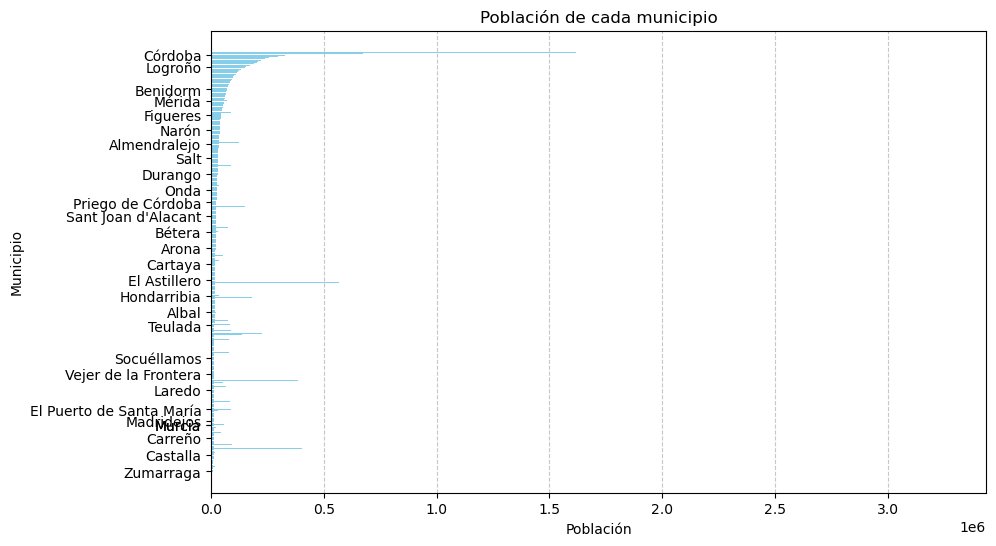

In [52]:
data_sorted = data.sort_values(by="Poblacion")
plt.figure(figsize=(10, 6))
plt.barh(data_sorted["Municipio"], data_sorted["Poblacion"], color='skyblue')
plt.xlabel('Población')
plt.ylabel('Municipio')
plt.title('Población de cada municipio')
plt.grid(axis='x', linestyle='--', alpha=0.7)
n = 30
plt.yticks(data_sorted["Municipio"][::n])
plt.show()

In [43]:
# a. ¿Cuál es la segunda ciudad más poblada?
segunda_ciudad = data_sorted.iloc[-2]["Municipio"]
print("a. La segunda ciudad más poblada es:", segunda_ciudad)

# b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
posicion_granada = data_sorted[data_sorted["Municipio"] == "Granada"].index[0] + 1
print("b. Granada ocupa la posición", posicion_granada, "en el ranking de las ciudades más pobladas.")

a. La segunda ciudad más poblada es: Barcelona
b. Granada ocupa la posición 273 en el ranking de las ciudades más pobladas.


3) ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?.

In [57]:
municipios_navarra = data[data["Provincia"] == "Navarra"]
municipios_navarra_5000 = municipios_navarra[municipios_navarra["Poblacion"] > 5000]
cantidad_municipios = municipios_navarra_5000.shape[0]
print("Cantidad de municipios de Navarra con más de 5000 habitantes:", cantidad_municipios)

Cantidad de municipios de Navarra con más de 5000 habitantes: 11


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [58]:
municipio_mas_al_norte = data.loc[data["Y"].idxmax()]
print("Municipio más al Norte:", municipio_mas_al_norte["Municipio"])
print("Provincia:", municipio_mas_al_norte["Provincia"])
print("Población:", municipio_mas_al_norte["Poblacion"])

Municipio más al Norte: Viveiro
Provincia: Lugo
Población: 16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [61]:
municipios_granada = data[data["Provincia"] == "Granada"]

media = municipios_granada["Poblacion"].mean()
mediana = municipios_granada["Poblacion"].median()
desviacion_estandar = municipios_granada["Poblacion"].std()
valor_maximo = municipios_granada["Poblacion"].max()
valor_minimo = municipios_granada["Poblacion"].min()

print("Granada:")
print("Media de población:", media)
print("Mediana de población:", mediana)
print("Desviación estándar de población:", desviacion_estandar)
print("Valor máximo de población:", valor_maximo)
print("Valor mínimo de población:", valor_minimo)

Granada:
Media de población: 30217.85
Mediana de población: 17526.0
Desviación estándar de población: 50355.49171459277
Valor máximo de población: 239154.0
Valor mínimo de población: 10386.0


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

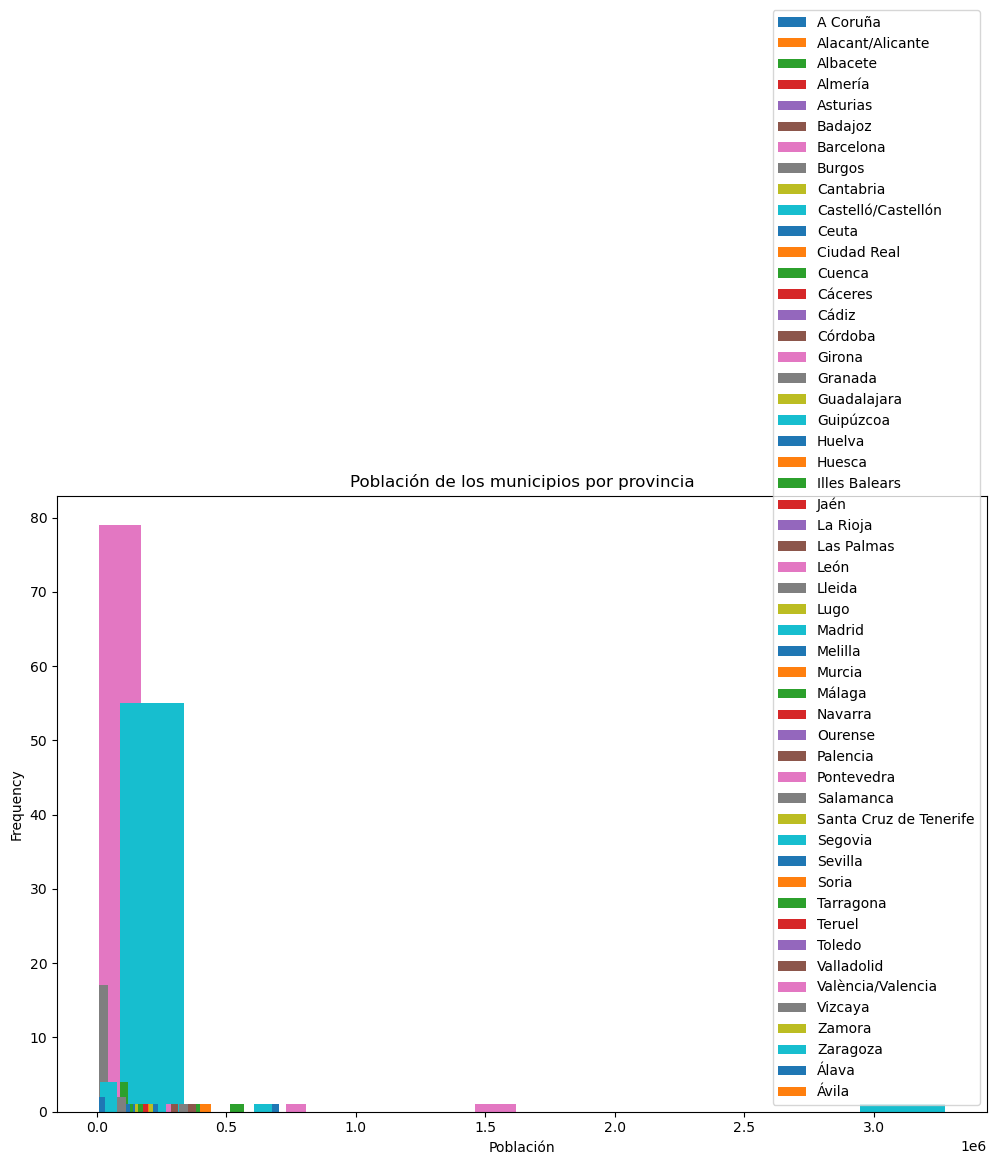

In [64]:
plt.figure(figsize=(12, 8))
data.groupby("Provincia")["Poblacion"].plot(kind="hist", alpha=1, legend=True)
plt.xlabel("Población")
plt.title("Población de los municipios por provincia")
plt.legend()
plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [76]:
municipios_aleatorios = data.sample(n=50, replace=False, random_state=1)

promedio_poblacion = municipios_aleatorios["Poblacion"].mean()
desviacion_estandar_poblacion = municipios_aleatorios["Poblacion"].std()

print("Promedio de la población:", promedio_poblacion)
print("Desviación estándar de la población:", desviacion_estandar_poblacion)

Promedio de la población: 92968.98
Desviación estándar de la población: 459474.0980776001


8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [80]:
madrid_data = data[data["Municipio"] == "Madrid"]
latitud_madrid = madrid_data.iloc[0]["Y"]
longitud_madrid = madrid_data.iloc[0]["X"]

def distancia_entre_puntos(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

data["Distancia a Madrid"] = distancia_entre_puntos(latitud_madrid, longitud_madrid, data["Y"], data["X"])
data = data[data["Municipio"] != "Madrid"]

municipio_mas_cercano = data.loc[data["Distancia a Madrid"].idxmin()]
municipio_mas_lejano = data.loc[data["Distancia a Madrid"].idxmax()]

print("Municipio más cercano a Madrid:", municipio_mas_cercano["Municipio"])
print("Distancia al municipio más cercano:", municipio_mas_cercano["Distancia a Madrid"])
print("Municipio más lejano a Madrid:", municipio_mas_lejano["Municipio"])
print("Distancia al municipio más lejano:", municipio_mas_lejano["Distancia a Madrid"])

Municipio más cercano a Madrid: Pozuelo de Alarcón
Distancia al municipio más cercano: 0.08096987608788916
Municipio más lejano a Madrid: Los Llanos de Aridane
Distancia al municipio más lejano: 18.444253845781045
